## 1. Importing Libraries

In [4]:
# Import libraries for data analysis
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from PIL import Image

# Import libraries for Natural Languge Processing
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import TextBlob

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Data Loading 

In [2]:
# Load your raw data
raw = pd.read_csv("resources/train.csv")

In [3]:
# Viewing data
raw.head()

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


## 3. Exploratory Data Analysis

The Exploratory Data Analysis was done on the Kaggle kernel which be found [here](#). What we will do here is apply the preprocessing from the Kaggle kernel in order to download the EDA visuals for the APP.

### 3.1 Functions

In [5]:
# Functions
# Creating a function to extract handles from tweets
def extract_handles(x):
    
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

# Creating a function to extract hashtags from tweets
def extract_hashtags(x):
    
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

def plot_bar(corpus, fig_name):
    """
    Plot top 15 words in corpus.

    Parameters:
        corpus - list of strings.
    """
    freq_dist = nltk.FreqDist(corpus.split(' '))
    corpus_df = pd.DataFrame({'Words': list(freq_dist.keys()), 'Count' : list(freq_dist.values())}).nlargest(columns='Count', n=15)
    sns.barplot(data=corpus_df, y='Words', x='Count')
    plt.savefig(fig_name)
    img = Image.open(fig_name) 
    return img

def word_cloud(corpus, fig_name):
    """
    Display a word cloud of the corpus.

    Parameters:
        corpus - list of string.
    """
    # Create word clouds of the most common words in the corpus
    wc = wordCloud.generate(corpus)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.savefig(fig_name)
    img = Image.open(fig_name) 
    return img 

def clean_tweet(raw_tweets):
    # Replace email addresses with 'email'
    tweets = raw_tweets.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', ' ')

    # Remove unicode strings
    tweets = tweets.str.replace(r'(\\u[0-9A-Fa-f]+)', '')
    tweets = tweets.str.replace(r'[^\x00-\x7f]', '')

    # Convert any url to URL
    tweets = tweets.str.replace('((www\.[^\s]+)|(https?://[^\s]+))', ' ')

    # Remove special characters, numbers, punctuation
    tweets = tweets.str.replace('[^a-zA-Z#@]+',' ')

    # Remove additional white spaces
    tweets = tweets.str.replace(r'\s+', ' ')
    tweets = tweets.str.replace(r'^\s+|\s+?$', '')

    # Change words to lower case
    tweets = tweets.str.lower()

    # Remove stop words from tweets
    stop_words = set(stopwords.words('english'))
    tweets = tweets.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

    tweets_df = pd.DataFrame(tweets)

    return tweets_df


### 3.2 Visuals

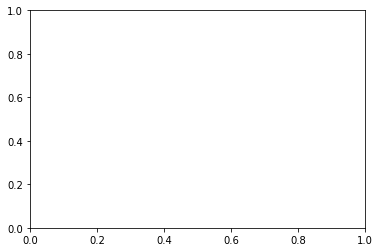

In [6]:
# Word cloud
wordCloud = WordCloud(width=800, height=500, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)

fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

In [9]:
# Clean tweets
tweets_df = clean_tweet(raw['message'])
tweets_df['sentiment'] = raw['sentiment']

# Create a Corpus for every class 
corpus = ' '.join([text for text in tweets_df['message']])
news_tweets = ' '.join([text for text in tweets_df['message'][tweets_df['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in tweets_df['message'][tweets_df['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in tweets_df['message'][tweets_df['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in tweets_df['message'][tweets_df['sentiment'] == -1]])

# Extracting handles from tweets
news_h = extract_handles(tweets_df['message'][tweets_df['sentiment'] == 2])
pro_h = extract_handles(tweets_df['message'][tweets_df['sentiment'] == 1])
neutral_h = extract_handles(tweets_df['message'][tweets_df['sentiment'] == 0])
anti_h = extract_handles(tweets_df['message'][tweets_df['sentiment'] == -1])

# Extracting hashtags from tweets
news_ht = extract_hashtags(tweets_df['message'][tweets_df['sentiment'] == 2])
pro_ht = extract_hashtags(tweets_df['message'][tweets_df['sentiment'] == 1])
neutral_ht = extract_hashtags(tweets_df['message'][tweets_df['sentiment'] == 0])
anti_ht = extract_hashtags(tweets_df['message'][tweets_df['sentiment'] == -1])

In [10]:
# Set image names
words_jpg = ['all_words0.jpg', 'news0.jpg', 'pro0.jpg', 'neutral0.jpg', 'anti0.jpg']
cloud_jpg = ['all_words1.jpg', 'news1.jpg', 'pro1.jpg', 'neutral1.jpg', 'anti1.jpg']
handl_jpg = ['news2.jpg', 'pro2.jpg', 'neutral2.jpg', 'anti2.jpg']
hasht_jpg = ['news3.jpg', 'pro3.jpg', 'neutral3.jpg', 'anti3.jpg']

# Unnesting list
hashtags = [sum(news_ht, []), sum(pro_ht, []), sum(neutral_ht, []),sum(anti_ht, [])]
handles = [sum(news_h, []), sum(pro_h, []), sum(neutral_h, []), sum(anti_h, [])]

tweet_list = [corpus, news_tweets, pro_tweets, neutral_tweets, anti_tweets]

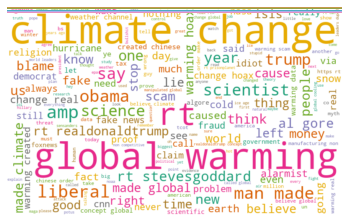

In [11]:
# Generate graphics
for i, sent in enumerate(handles):
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    sns.barplot(data=df, y='Handle', x='Count')
    plt.savefig(handl_jpg[i])
    
for i, sent in enumerate(hashtags):
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    sns.barplot(data=df, y='Handle', x='Count')
    plt.savefig(hasht_jpg[i])
    
for i, sent in enumerate(tweet_list):
    plot_bar(sent, words_jpg[i])
    word_cloud(sent, cloud_jpg[i])